**Music Recommendation System** - Sean McLean

**Milestone 1**

**Problem Definition**

The context: Why is this problem important to solve?

The objectives: What is the intended goal?

The key questions: What are the key questions that need to be answered?

The problem formulation: What are we trying to solve using data science?

**Data Dictionary**

The core data is the Taste Profile Subset released by the Echo Nest as part of the Million Song Dataset. There are two files in this dataset. The first file contains the details about the song id, titles, release, artist name, and the year of release. The second file contains the user id, song id, and the play count of users.

song_data

song_id - A unique id given to every song

title - Title of the song

Release - Name of the released album

Artist_name - Name of the artist

year - Year of release

count_data

user _id - A unique id given to the user

song_id - A unique id given to the song

play_count - Number of times the song was played

**Data Source**

http://millionsongdataset.com/

**Important Notes**

-This notebook can be considered a guide to refer to while solving the problem. The evaluation will be as per the Rubric shared for each Milestone. Unlike previous courses, it does not follow the pattern of the graded questions in different sections. This notebook would give you a direction on what steps need to be taken to get a feasible solution to the problem. Please note that this is just one way of doing this. There can be other 'creative' ways to solve the problem, and we encourage you to feel free and explore them as an 'optional' exercise.

-In the notebook, there are markdown cells called Observations and Insights. It is a good practice to provide observations and extract insights from the outputs.

-The naming convention for different variables can vary. Please consider the code provided in this notebook as a sample code.

-All the outputs in the notebook are just for reference and can be different if you follow a different approach.

-There are sections called Think About It in the notebook that will help you get a better understanding of the reasoning behind a particular technique/step. Interested learners can take alternative approaches if they want to explore different techniques.

**Importing Libraries and the Dataset**

In [42]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [43]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.metrics.pairwise import cosine_similarity

from collections import defaultdict

from sklearn.metrics import mean_squared_error

**Load the dataset**

In [44]:
count_df = pd.read_csv('/content/drive/MyDrive/count_data.csv')
song_df = pd.read_csv('/content/drive/MyDrive/song_data.csv')

**Understanding the data by viewing a few observations**

In [45]:
count_df.head(10)

,Unnamed: 0,user_id,song_id,play_count
0,0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
2,2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1
3,3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1
4,4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1
5,5,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODDNQT12A6D4F5F7E,5
6,6,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODXRTY12AB0180F3B,1
7,7,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFGUAY12AB017B0A8,1
8,8,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFRQTD12A81C233C0,1
9,9,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOHQWYZ12A6D4FA701,1


In [46]:
song_df.head(10)

,song_id,title,release,artist_name,year
0,SOQMMHC12AB0180CB8,Silent Night,Monster Ballads X-Mas,Faster Pussy cat,2003
1,SOVFVAK12A8C1350D9,Tanssi vaan,Karkuteillä,Karkkiautomaatti,1995
2,SOGTUKN12AB017F4F1,No One Could Ever,Butter,Hudson Mohawke,2006
3,SOBNYVR12A8C13558C,Si Vos Querés,De Culo,Yerba Brava,2003
4,SOHSBXH12A8C13B0DF,Tangle Of Aspens,Rene Ablaze Presents Winter Sessions,Der Mystic,0
5,SOZVAPQ12A8C13B63C,"Symphony No. 1 G minor ""Sinfonie Serieuse""/All...",Berwald: Symphonies Nos. 1/2/3/4,David Montgomery,0
6,SOQVRHI12A6D4FB2D7,We Have Got Love,Strictly The Best Vol. 34,Sasha / Turbulence,0
7,SOEYRFT12AB018936C,2 Da Beat Ch'yall,Da Bomb,Kris Kross,1993
8,SOPMIYT12A6D4F851E,Goodbye,Danny Boy,Joseph Locke,0
9,SOJCFMH12A8C13B0C2,Mama_ mama can't you see ?,March to cadence with the US marines,The Sun Harbor's Chorus-Documentary Recordings,0


**Let us check the data types and and missing values of each column**

In [47]:
count_df['user_id'].nunique()

76353

In [48]:
song_df['song_id'].nunique()

999056

In [49]:
count_df['song_id'].nunique()

10000

In [50]:
count_df['play_count'].nunique()

295

In [51]:
song_df.describe()

,year
count,1000000.000000
mean,1030.325652
std,998.745002
min,0.000000
25%,0.000000
50%,1969.000000
75%,2002.000000
max,2011.000000


In [52]:
count_df.describe()

,Unnamed: 0,play_count
count,2.000000e+06,2.000000e+06
mean,9.999995e+05,3.045485e+00
std,5.773504e+05,6.579720e+00
min,0.000000e+00,1.000000e+00
25%,4.999998e+05,1.000000e+00
50%,9.999995e+05,1.000000e+00
75%,1.499999e+06,3.000000e+00
max,1.999999e+06,2.213000e+03


In [53]:
song_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   song_id      1000000 non-null  object
 1   title        999985 non-null   object
 2   release      999995 non-null   object
 3   artist_name  1000000 non-null  object
 4   year         1000000 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 38.1+ MB


In [54]:
song_df.isnull().sum()

song_id         0
title          15
release         5
artist_name     0
year            0
dtype: int64

In [55]:
count_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 4 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   Unnamed: 0  int64 
 1   user_id     object
 2   song_id     object
 3   play_count  int64 
dtypes: int64(2), object(2)
memory usage: 61.0+ MB


In [56]:
count_df.isnull().sum()

Unnamed: 0    0
user_id       0
song_id       0
play_count    0
dtype: int64

**Observations and Insights**: 


*   Overall there are 1,000,000 songs in the file and 2,000,000 interactions in the count file. In the song file there are a total 20 of missing values with 15 coming from the song titles column and the other 5 that derive from the album release column. Most of the data types in the two files are objective with the other few being integer data types, including how many times a song was played. 
*   One thing I noticed is that from the first 10 records in the song file is that there are several 0's under the year column, even though they are zero missing values when looking at the data types. This could possibly impact the users recommendations if the time period is a key aspect of what a user listens to. For example, if a user listens to a lot of music from the 1970's, the best recommendations from that era may not be provided to the user because that information is missing. From the count file there doesn't seem to be anything that stands out like missing values.
*   From the count file there doesn't seem to be anything that stands out like missing values.




In [57]:
df = pd.merge(count_df, song_df.drop_duplicates(['song_id']), on="song_id", how="left")

In [58]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

**Think About It:** As the user_id and song_id are encrypted. Can they be encoded to numeric features?

*   Encrypting the user_id and song_id columns in the files I believe can be encoded to numeric features and would be easier to visualize. Their original objective data type has each entry as being a large group of numbers and letters, so encoding them to just being a numeric feature will be easier to understand for future visualization and programming.

In [59]:
!pip install scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [60]:
from pandas.core.arrays.interval import le
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics.pairwise import cosine_similarity

le = LabelEncoder()

df['user_id'] = le.fit_transform(df['user_id'])

df['song_id'] = le.fit_transform(df['song_id'])

In [61]:
df.head()

,user_id,song_id,play_count,title,release,artist_name,year
0,54961,153,1,The Cove,Thicker Than Water,Jack Johnson,0
1,54961,413,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
2,54961,736,1,Stronger,Graduation,Kanye West,2007
3,54961,750,1,Constellations,In Between Dreams,Jack Johnson,2005
4,54961,1188,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999


**Think About It:** As the data also contains users who have listened to very few songs and vice versa, is it required to filter the data so that it contains users who have listened to a good count of songs and vice versa?

*   I think collectively it makes sense to include both types of users in terms of how many songs they have listened to. Regardless of how many listens a user has I think there is enough information there to include both types of users where a reliable recommendation system can be built. I think even if a user has only listened to a small amount of songs that there could still be some commonalities between the listened songs where a recommendation system can be built and wouldn't be too much different from a user who has listened to a lot of songs. Despite this, more listens would create a better recommendation system with the amount of data to use.

In [62]:
users = df.user_id

ratings_count = dict()

for user in users:
    
    if user in ratings_count:
        ratings_count[user] += 1
    
    else:
        ratings_count[user] = 1

In [63]:
RATINGS_CUTOFF = 90

remove_users = []

for user, num_ratings in ratings_count.items():
    
    if num_ratings < RATINGS_CUTOFF:
        remove_users.append(user)

df = df.loc[ ~ df.user_id.isin(remove_users)]

In [64]:
songs = df.song_id

ratings_count = dict()

for song in songs:
    
    if song in ratings_count:
        ratings_count[song] += 1
    
    else:
        ratings_count[song] = 1 

In [65]:
RATINGS_CUTOFF = 120

remove_songs = []

for song, num_ratings in ratings_count.items():
    if num_ratings < RATINGS_CUTOFF:
        remove_songs.append(song)

df_final = df.loc[ ~ df.song_id.isin(remove_songs)]

In [66]:
df_final=df_final[df_final.play_count<=5]

In [67]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117876 entries, 200 to 1999765
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   user_id      117876 non-null  int64 
 1   song_id      117876 non-null  int64 
 2   play_count   117876 non-null  int64 
 3   title        117876 non-null  object
 4   release      117876 non-null  object
 5   artist_name  117876 non-null  object
 6   year         117876 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 7.2+ MB


In [68]:
df_final.shape

(117876, 7)

In [69]:
df_final.size

825132

In [70]:
df_final.ndim

2

In [71]:
df_final.head()

,user_id,song_id,play_count,title,release,artist_name,year
200,6958,447,1,Daisy And Prudence,Distillation,Erin McKeown,2000
202,6958,512,1,The Ballad of Michael Valentine,Sawdust,The Killers,2004
203,6958,549,1,I Stand Corrected (Album),Vampire Weekend,Vampire Weekend,2007
204,6958,703,1,They Might Follow You,Tiny Vipers,Tiny Vipers,2007
205,6958,719,1,Monkey Man,You Know I'm No Good,Amy Winehouse,2007


**Exploratory Data Analysis**

**Let's check the total number of unique users, songs, artists in the data**

Total number of unique user id

In [72]:
print('Number of unique USERS in Raw data = ', df_final['user_id'].nunique())

Number of unique USERS in Raw data =  3155


Total number of unique song id

In [73]:
print('Number of unique SONGS in Raw data = ', df_final['song_id'].nunique())

Number of unique SONGS in Raw data =  563


Total number of unique artists

In [74]:
print('Number of unique ARTISTS in Raw data = ', df_final['artist_name'].nunique())

Number of unique ARTISTS in Raw data =  232


Observations and Insights:

*   There is a decent amount of unique users that have listened to at least 90 songs in the dataset but after the reduction of users from the minimum requirement of songs listened to I am surprised it is still kind of high. My guess is that many users just listen to music casually without repeating songs or the recommendation system in place from past interactions isn't entirely suited to their music interests.
*   There is a much smaller number of unique songs in the revised dataset which indicates that they are getting a lot of users listening to them. Maybe these are attractive songs for the recommendation system to suggest in terms of past interactions but not popular songs in the mainstream where they will receive more than one listen on a streaming service.
*   The total number of unique artists is even smaller than the unique songs so based off the revised dataset maybe these are lesser known artists in terms of popularity or its possible they don't have much music available in the dataset. Maybe they also did not receive enough listens of their music so they did not show up in the condensed dataset.





**Let's find out about the most interacted songs and interacted users**

Most interacted songs

In [75]:
most_rated = df_final.groupby('song_id').size().sort_values(ascending = False)[:10]
most_rated

song_id
8582    751
352     748
2220    713
1118    662
4152    652
5531    618
4448    609
6189    606
6293    583
1334    570
dtype: int64

Most interacted users

In [76]:
most_rated = df_final.groupby('user_id').size().sort_values(ascending = False)[:10]
most_rated

user_id
61472    243
15733    227
37049    202
9570     184
23337    177
10763    176
9097     175
26616    175
43041    174
65994    171
dtype: int64

Observations and Insights:

*   Despite a reduced dataset from the revised requirements put in place, there are still plenty of songs that have been played by users or have been seeked out by users to listen to and more than once. Even looking at the top 50 songs there is over 400 interactions per song. 
*   The total amount of interactions in the list of users is smaller than the song interactions with the top user haivng 247 interactions. With a million songs in the database this means that a stronger recommendation could be implemented so that more interactions take place.



Songs played in a year

In [77]:
count_songs = df_final.groupby('year').count()['title']

count = pd.DataFrame(count_songs)

count.drop(count.index[0], inplace = True)

count.tail()

,title
year,
2006,7592
2007,13750
2008,14031
2009,16351
2010,4087


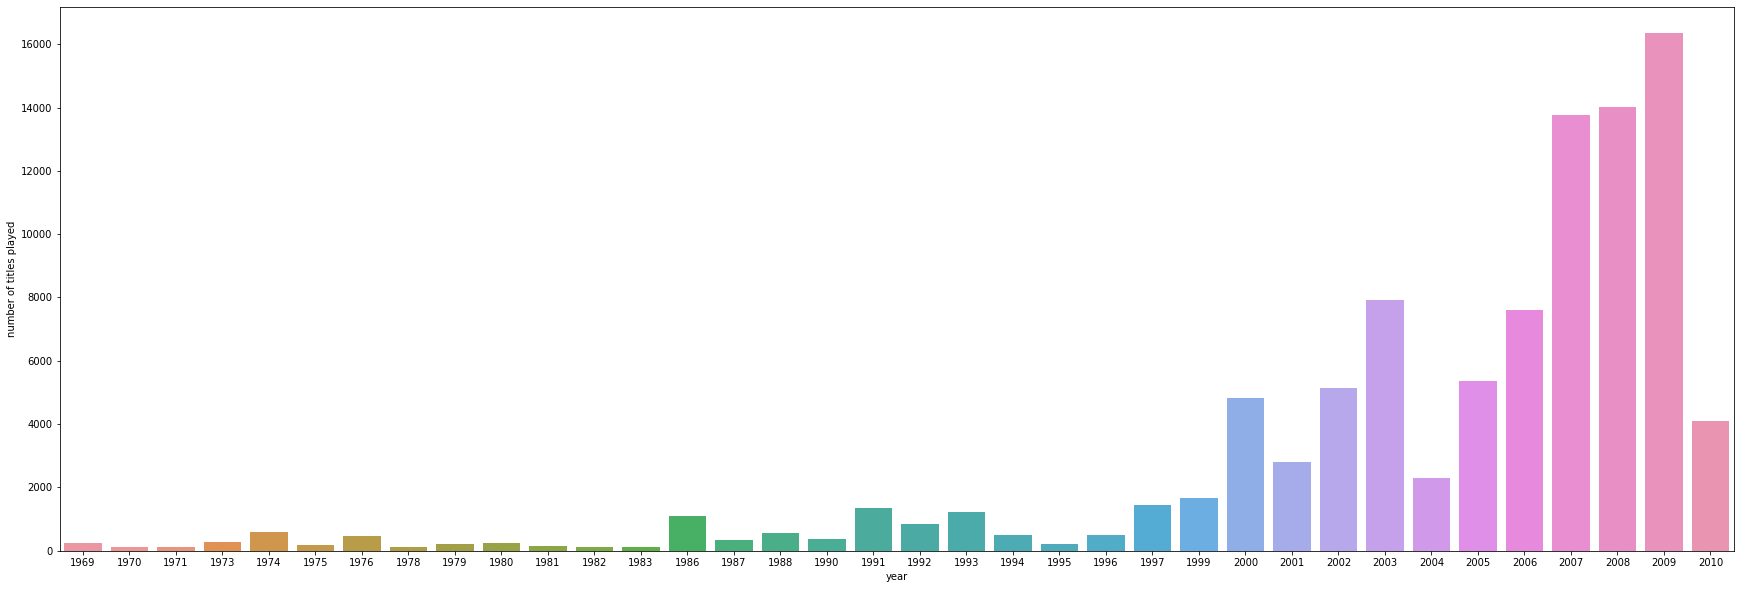

In [78]:
plt.figure(figsize = (30, 10))

sns.barplot(x = count.index,
            y = 'title',
            data = count,
            estimator = np.median)

plt.ylabel('number of titles played') 

plt.show()

Observations and Insights:

*   From the last five years there is a noticable difference in songs that came from those years compared to previous years. This might idenitfy a certain demographic in who is using the database and what songs and artists they are listening to. 
*   Looking at the graph it clearly shows that the amount of songs in the database decrease the farther back you go in years. From this century the majority of the songs come from that time frame, while there is some songs from the 1990's but much lower in quantity. It becomes very small in numbers before 1990, so the newer the song the more likely that it is going to be listened to by the user.



Think About It: What other insights can be drawn using exploratory data analysis?

*   From the values you can see what users are listening to more than anything which is newer music and that they are not seeking out older music, but it could also depend on the age of the user.
*   If the majority of songs are newer, then building a recommendation system based off that information could make it easier to find the 10 best recommendated songs depending on past interactions.
*   If there are less unique artists then this could also be important to constructing an algorithm where it can locate popular artists but also find lesser known artists that can be recommended to users.






**Proposed approach**

Potential techniques: What different techniques should be explored?

Overall solution design: What is the potential solution design?

Measures of success: What are the key measures of success to compare different potential technqiues?